# Exercise sheet 2

__Handout date:__ 23.05.2024  
__Submission deadline:__ 19.06.2024 - 23:59  
__Topics:__ Classification.  
__Submission link:__ https://fz-juelich.sciebo.de/s/qwm3ipclLcnfyOo

Add your answers by editing the marked cells. Keep your answers brief and clear.

## MNIST - Dataset

-- __Task__: Load the MNIST-dataset from scikit-learn

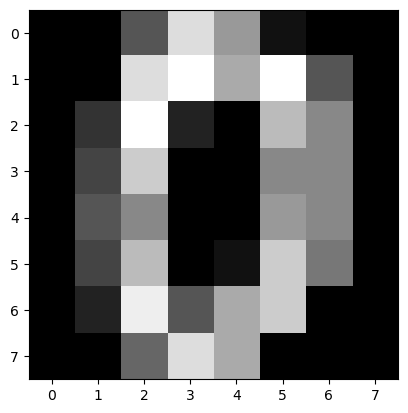

In [1]:
from sklearn import datasets
import matplotlib.pyplot as plt
digits = datasets.load_digits()

plt.imshow(next(iter(digits.images)), cmap='gray')

-- __Task__: Split the dataset into train- (70%), validation- (20%) and test-dataset (10%) (with [sklearn - train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html))

In [2]:
from sklearn.model_selection import train_test_split

# split the data into train and test sets
train_data, test_data, train_target, test_target = train_test_split(digits.data, digits.target, test_size=0.3, random_state=1)
# further split the data into validation and test sets
val_data, test_data, val_target, test_target = train_test_split(test_data, test_target, test_size=0.3333, random_state=1)

# print the shape of the data
print(digits.images.shape)
print(train_data.shape, val_data.shape, test_data.shape)

(1797, 8, 8)
(1257, 64) (360, 64) (180, 64)


-- __Task__: Visualize the first training example of each class

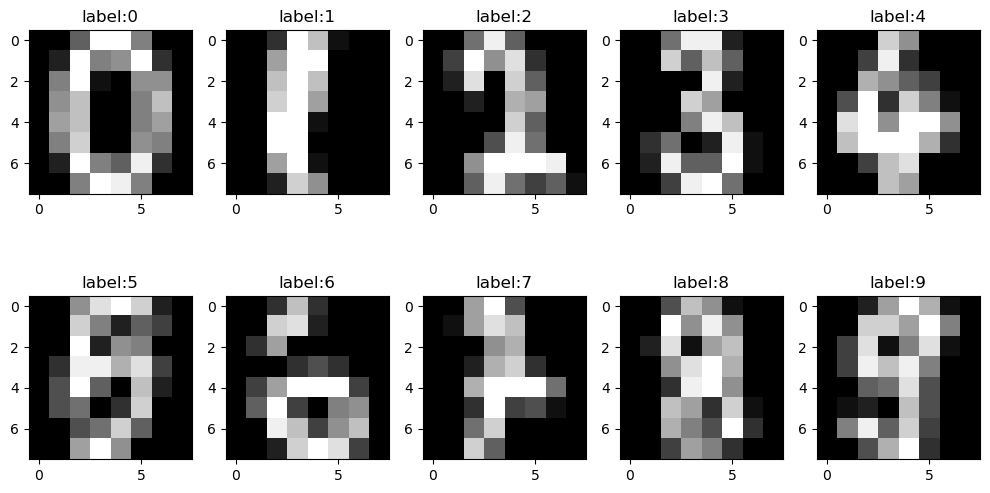

In [3]:
plt.figure(figsize=(10, 7), layout="tight")
for i in range(10):
    plt.subplot(2, 5, i+1)
    for image, label in zip(train_data, train_target):
        if label == i:
            plt.gca().set_title("label:{}".format(i))
            plt.imshow(image.reshape(8, 8), cmap='gray')
            break

## kNN - Classification

There are two hyperparameters for kNN-Classification: the distance metric and k. In this exercise we will use the Manhattan distance (L1), and will find the optimal k.

-- __Question__: Name one advantage and one disadvantage of kNN-Classification.

__Answer__:

- Advantage: Easy to interpret and implement 

- Disadvantage: the predicting process requires a lot of computational power 
for similarity calculation.

-- __Task__: Choose k=1. Calculate a kNN model with k=1 using the scikit-learn package. Only use the training dataset for the model.

In [4]:
from sklearn.neighbors import KNeighborsClassifier

# create the model
model = KNeighborsClassifier(n_neighbors=1, metric = "l1" )
# fit the model
model.fit(train_data, train_target)

KNeighborsClassifier(metric='l1', n_neighbors=1)

-- __Task__: Calculate the prediction of this model for the validation datset.

In [5]:
# predict the validation data
model.predict(val_data)

array([4, 2, 6, 1, 8, 1, 9, 9, 0, 8, 0, 4, 6, 4, 2, 4, 9, 5, 4, 0, 8, 6,
       3, 5, 3, 1, 2, 0, 4, 1, 8, 2, 9, 5, 4, 8, 2, 1, 9, 4, 1, 6, 8, 8,
       9, 0, 7, 5, 8, 7, 3, 9, 0, 7, 0, 9, 3, 7, 0, 3, 6, 5, 1, 1, 3, 4,
       2, 9, 1, 6, 0, 9, 4, 5, 7, 1, 4, 7, 4, 8, 3, 2, 8, 4, 2, 0, 7, 6,
       9, 6, 6, 9, 9, 7, 3, 4, 0, 9, 9, 6, 0, 7, 6, 3, 9, 7, 4, 5, 9, 4,
       2, 1, 0, 3, 2, 7, 4, 3, 3, 0, 3, 0, 3, 3, 8, 2, 9, 9, 0, 5, 8, 4,
       1, 9, 6, 3, 4, 3, 4, 1, 5, 8, 2, 0, 4, 0, 3, 0, 7, 7, 2, 7, 5, 6,
       4, 2, 8, 3, 8, 7, 0, 8, 6, 8, 9, 7, 5, 7, 1, 1, 3, 4, 5, 1, 3, 1,
       6, 8, 1, 0, 3, 9, 8, 0, 1, 8, 3, 5, 5, 3, 8, 0, 9, 7, 7, 5, 8, 6,
       7, 1, 4, 0, 9, 0, 9, 4, 3, 4, 2, 6, 3, 9, 2, 8, 0, 3, 5, 7, 3, 4,
       2, 9, 2, 0, 9, 3, 6, 3, 5, 9, 5, 3, 7, 4, 9, 9, 1, 8, 2, 5, 0, 3,
       5, 8, 4, 7, 6, 8, 4, 4, 9, 4, 1, 3, 3, 0, 4, 1, 4, 3, 3, 1, 6, 7,
       9, 6, 2, 1, 9, 3, 3, 5, 9, 7, 2, 4, 8, 1, 4, 3, 2, 7, 6, 4, 4, 4,
       2, 9, 0, 0, 7, 7, 4, 8, 3, 6, 6, 0, 7, 0, 0,

-- __Task__: Repeat these steps for k=1 to 10.

In [6]:
import numpy as np
val_pred = []
for k in range(1, 11):
    model = KNeighborsClassifier(n_neighbors=k, metric ="l1")
    model.fit(train_data, train_target)
    val_pred.append(model.score(val_data, val_target))

val_pred = np.array(val_pred)

-- __Task__: Plot the accuracy for k=1 to 10. Choose the best k.

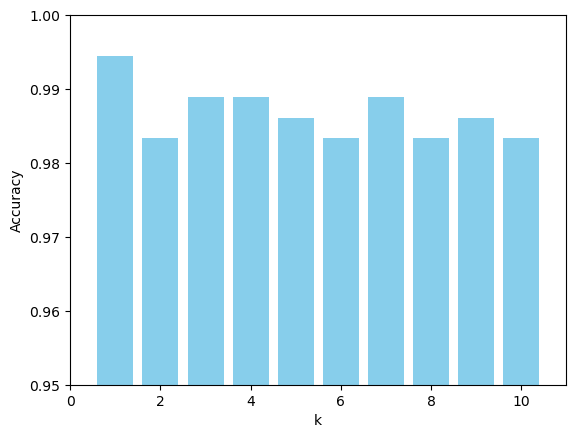

In [7]:
plt.bar(range(1, 11), val_pred, color='skyblue')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.xlim(0, 11)
plt.ylim(0.95, 1)
plt.show()

-- __Task__: Train a new kNN model with your chosen k and the train- and validation-dataset.

In [46]:
model = KNeighborsClassifier(n_neighbors=1, metric="l1")
model.fit(np.concatenate([train_data, val_data]), np.concatenate([train_target, val_target]))

KNeighborsClassifier(metric='l1', n_neighbors=1)

-- __Task__: Evaluate the final model on the test-dataset.

In [47]:
test_pred_knn = model.predict(test_data)
acc_knn = model.score(test_data, test_target)
acc_knn

0.9777777777777777

-- __Task__: Plot a [confusion matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) of the model on the test-dataset.

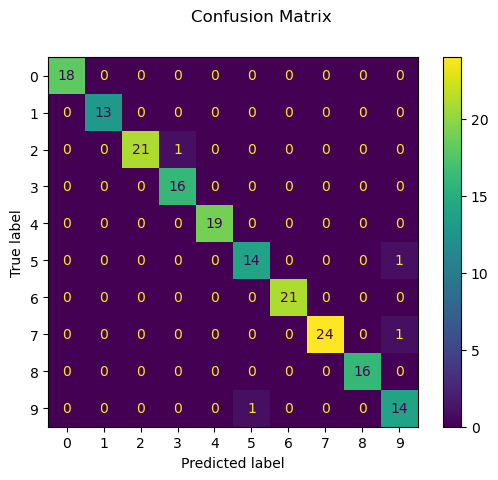

In [11]:
from sklearn import metrics
disp = metrics.ConfusionMatrixDisplay.from_predictions(test_target, test_pred_knn)
disp.figure_.suptitle("Confusion Matrix")
plt.show()

-- __Question__: Which two classes are confused the most? Does this results surprise you?

7 and 9 could be even confused by human.
I would expect the prediction to be less accurate.

__Answer__:

## PCA and linear classification

In these next tasks we want to compute simple features and use them to train a linear classifier.

--__Task__: Calculate a [PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) for the training dataset.

In [12]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(train_data)

PCA()

-- __Task__: Choose as many principal components as needed to reach 90% explained variance.

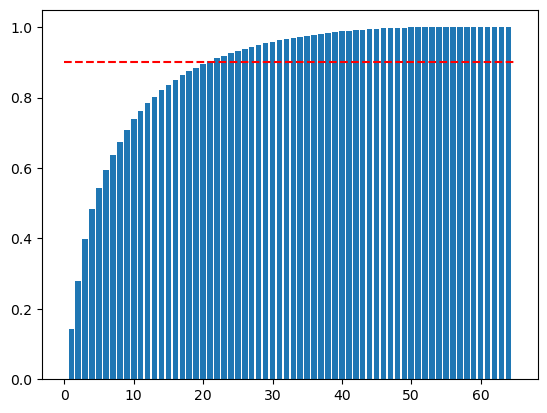

The number of principal components required to reach 90% explained 
     variance is 21


In [13]:
plt.bar(range(1, 65), np.cumsum(pca.explained_variance_ratio_))
plt.hlines(0.90, 0, 65, color='red', linestyles='dashed')
plt.show()
print("The number of principal components required to reach 90% explained \n \
    variance is {}".format((np.cumsum(pca.explained_variance_ratio_) > 0.9).argmax()+1))


-- __Task__: Train a [linear classifier](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html#sklearn.linear_model.Perceptron) with these principal components.

In [14]:
from sklearn.linear_model import LogisticRegression
pca.n_components = 20

model = LogisticRegression(max_iter = 10000)
model.fit(pca.fit_transform(np.concatenate([train_data, val_data])), np.concatenate([train_target, val_target]))

LogisticRegression(max_iter=10000)

-- __Task__: Compute the accuracy for this model on the test-dataset.

In [15]:
test_pred_pca = model.predict(pca.transform(test_data))
acc_pca = model.score(pca.transform(test_data), test_target)

## MLP classification

Training a CNN neural network is too complex for a exercise sheet, but we will revisit them for our next project. In this exercise we will train a multi-layer-perceptron for the classification task on the MNIST-dataset.

-- __Task__: Normalize the training data to `mean=0` and `std=1`.

In [16]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler().fit(train_data)
train_data_norm = scalar.transform(train_data)

-- __Task__: Fit an [MLP](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier) with appropriate hyperparameters.

In [17]:
from sklearn.neural_network import MLPClassifier
model= MLPClassifier()
model.fit(train_data_norm, train_target)

MLPClassifier()

-- __Task__: Apply the model to the test dataset (don't forget to normalize the test dataset).

In [18]:
scalar = StandardScaler().fit(test_data)
test_data_norm = scalar.transform(test_data)
test_pred_mlp = model.predict(test_data_norm)
acc_mlp = model.score(test_data_norm, test_target)

-- __Task__: Calculate the confusion matrix for the test dataset.

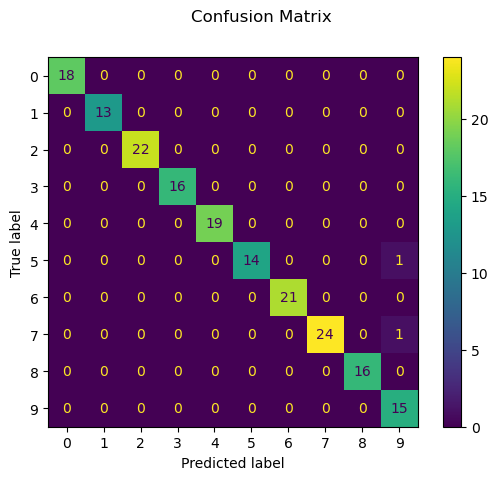

In [19]:
from sklearn import metrics
disp = metrics.ConfusionMatrixDisplay.from_predictions(test_target, test_pred_mlp)
disp.figure_.suptitle("Confusion Matrix")
plt.show()

## Comparison

-- __Task__: Plot the accuracy of all three models (kNN, PCA + Linear and MLP).

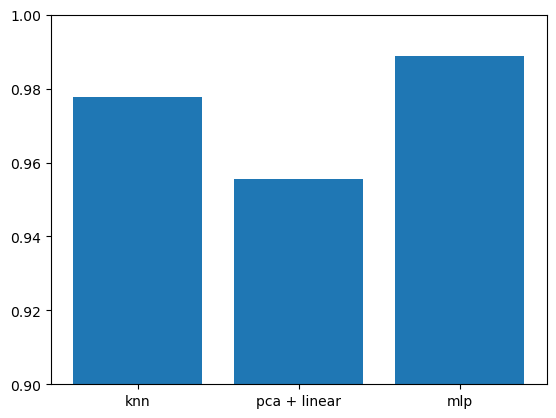

In [37]:
labels = ["knn", "pca + linear", "mlp"]
plt.bar(labels, [acc_knn, acc_pca, acc_mlp], label = [acc_knn, acc_pca, acc_mlp])
plt.ylim(0.9, 1)
plt.show()

-- __Task__: Choose the best model and think of a possible improvement.

In [68]:
print(acc_mlp)
model= MLPClassifier(hidden_layer_sizes = (100, 50, 30,))
model.fit(train_data_norm, train_target)


0.9888888888888889


MLPClassifier()

In [70]:
model.score(test_data_norm, test_target)

0.9833333333333333